### SAYANTAN RAHA
## Roll # : BAI09056
### IIMB - BAI09 - Assignment 4

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off Code"></form>''')

In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [527]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [528]:
pd.options.display.max_columns = None

In [529]:
data = pd.read_excel('./Clustering_Raw_data.xlsx', skiprows=1)

In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 21 columns):
Unnamed: 0                 185 non-null int64
Unnamed: 1                 185 non-null int64
Unnamed: 2                 185 non-null object
CRESCENT                   185 non-null float64
CRESCENT MIX N' MATCH      185 non-null float64
CRESCENT POISE             185 non-null float64
CRESCENT SET               185 non-null float64
BLINK                      185 non-null float64
SAHAR                      185 non-null float64
CRESCENT.1                 185 non-null float64
CRESCENT MIX N' MATCH.1    185 non-null float64
CRESCENT POISE.1           185 non-null float64
CRESCENT SET.1             185 non-null float64
BLINK.1                    185 non-null float64
SAHAR.1                    185 non-null float64
CRESCENT.2                 185 non-null float64
CRESCENT MIX N' MATCH.2    185 non-null float64
CRESCENT POISE.2           185 non-null float64
CRESCENT SET.2             185 non-n

In [531]:
data.columns = [ 'Store_Id','Store_Area','Zone','Net_Sales_CRESCENT','Net_Sales_CRESCENT_MIX_N_MATCH',
                'Net_Sales_CRESCENT_POISE','Net_Sales_CRESCENT_SET','Net_Sales_BLINK','Net_Sales_SAHAR',
                'Discount_CRESCENT','Discount_CRESCENT_MIX_N_MATCH','Discount_CRESCENT_POISE',
                'Discount_CRESCENT_SET','Discount_BLINK','Discount_SAHAR','Cost_CRESCENT', 
                'Cost_CRESCENT_MIX_N_MATCH','Cost_CRESCENT_POISE','Cost_CRESCENT_SET','Cost_BLINK','Cost_SAHAR']

In [532]:
data.head()

,Store_Id,Store_Area,Zone,Net_Sales_CRESCENT,Net_Sales_CRESCENT_MIX_N_MATCH,Net_Sales_CRESCENT_POISE,Net_Sales_CRESCENT_SET,Net_Sales_BLINK,Net_Sales_SAHAR,Discount_CRESCENT,Discount_CRESCENT_MIX_N_MATCH,Discount_CRESCENT_POISE,Discount_CRESCENT_SET,Discount_BLINK,Discount_SAHAR,Cost_CRESCENT,Cost_CRESCENT_MIX_N_MATCH,Cost_CRESCENT_POISE,Cost_CRESCENT_SET,Cost_BLINK,Cost_SAHAR
0,1879,8154,EAST,0.0,523481.52,0.0,224348.65,88251.23,0.0,0.0,253126.98,0.0,118631.45,47094.97,0.0,0.0,306384.07,0.0,133800.61,54759.22,0.0
1,1885,11032,WEST,0.0,479126.98,0.0,224900.11,151922.16,0.0,0.0,268027.62,0.0,138734.19,85510.84,0.0,0.0,295953.89,0.0,145927.35,99258.18,0.0
2,1903,8374,EAST,0.0,456677.50,0.0,245383.60,109682.23,0.0,0.0,191772.60,0.0,113301.20,49827.27,0.0,0.0,255847.23,0.0,141408.60,65928.58,0.0
3,1911,4001,WEST,0.0,178680.82,0.0,25856.39,3499.06,0.0,0.0,130254.18,0.0,22296.61,2988.94,0.0,0.0,125563.52,0.0,19183.17,2861.93,0.0
4,1916,6603,NORTH,0.0,236793.24,0.0,68630.76,92294.53,0.0,0.0,130006.86,0.0,36949.24,54758.47,0.0,0.0,145940.63,0.0,43577.73,59467.68,0.0


# Q-1-1

## Feature Engineering

### Create Dummy variables / One Hot Encoding of Zone

In [533]:
data = pd.concat([data, pd.get_dummies(data.Zone)], axis = 'columns')
data.drop('Zone', axis = 1, inplace = True)
data.head(3)

,Store_Id,Store_Area,Net_Sales_CRESCENT,Net_Sales_CRESCENT_MIX_N_MATCH,Net_Sales_CRESCENT_POISE,Net_Sales_CRESCENT_SET,Net_Sales_BLINK,Net_Sales_SAHAR,Discount_CRESCENT,Discount_CRESCENT_MIX_N_MATCH,Discount_CRESCENT_POISE,Discount_CRESCENT_SET,Discount_BLINK,Discount_SAHAR,Cost_CRESCENT,Cost_CRESCENT_MIX_N_MATCH,Cost_CRESCENT_POISE,Cost_CRESCENT_SET,Cost_BLINK,Cost_SAHAR,EAST,NORTH,SOUTH,WEST
0,1879,8154,0.0,523481.52,0.0,224348.65,88251.23,0.0,0.0,253126.98,0.0,118631.45,47094.97,0.0,0.0,306384.07,0.0,133800.61,54759.22,0.0,1,0,0,0
1,1885,11032,0.0,479126.98,0.0,224900.11,151922.16,0.0,0.0,268027.62,0.0,138734.19,85510.84,0.0,0.0,295953.89,0.0,145927.35,99258.18,0.0,0,0,0,1
2,1903,8374,0.0,456677.50,0.0,245383.60,109682.23,0.0,0.0,191772.60,0.0,113301.20,49827.27,0.0,0.0,255847.23,0.0,141408.60,65928.58,0.0,1,0,0,0


### Profitability / Store Area Unit Calculation

We will now calculate the per unit are profitability of Store. The following formula is used to calculate the same:
- Profitability_Cresent = (Net Sales of Cresent - Cost of Cresent) / Total Area of the Store
- We will create 6 such variables for each product

In [534]:
data['Profit_C_SA'] = (data['Net_Sales_CRESCENT'] - data['Cost_CRESCENT'])/ data['Store_Area']
data['Profit_C_MNM_SA'] = (data['Net_Sales_CRESCENT_MIX_N_MATCH'] - data['Cost_CRESCENT_MIX_N_MATCH'])/ data['Store_Area']
data['Profit_C_P_SA'] = (data['Net_Sales_CRESCENT_POISE'] - data['Cost_CRESCENT_POISE'])/ data['Store_Area']
data['Profit_C_S_SA'] = (data['Net_Sales_CRESCENT_SET'] - data['Cost_CRESCENT_SET'])/ data['Store_Area']
data['Profit_B_SA'] = (data['Net_Sales_BLINK'] - data['Cost_BLINK'])/ data['Store_Area']
data['Profit_S_SA'] = (data['Net_Sales_SAHAR'] - data['Cost_SAHAR'])/ data['Store_Area']

data[[c for c in data.columns if 'Profit' in c]].head(3)

,Profit_C_SA,Profit_C_MNM_SA,Profit_C_P_SA,Profit_C_S_SA,Profit_B_SA,Profit_S_SA
0,0.0,26.624657,0.0,11.104739,4.107433,0.0
1,0.0,16.603797,0.0,7.158517,4.773747,0.0
2,0.0,23.982597,0.0,12.416408,5.224940,0.0


### Discount / Total Sales (Discount Sensitivity)
- Discount Sensitivity is calculated as Revenue earned by Sales of Product on Discount / Total revue from Product
- We will create 6 such variable for 6 different products

In [535]:
data['Sens_C_SA'] = data['Discount_CRESCENT']/ (data['Net_Sales_CRESCENT'])
data['Sens_C_MNM_SA'] = data['Discount_CRESCENT_MIX_N_MATCH'] / (data['Net_Sales_CRESCENT_MIX_N_MATCH'])
data['Sens_C_P_SA'] = data['Discount_CRESCENT_POISE'] / (data['Net_Sales_CRESCENT_POISE'])
data['Sens_C_S_SA'] =  data['Discount_CRESCENT_SET'] / (data['Net_Sales_CRESCENT_SET'])
data['Sens_B_SA'] =  data['Discount_BLINK'] / (data['Net_Sales_BLINK'])
data['Sens_S_SA'] =  data['Discount_SAHAR'] / (data['Net_Sales_SAHAR'])
data.fillna(0, inplace = True)
data[[c for c in data.columns if 'Sens' in c]].head(3)

,Sens_C_SA,Sens_C_MNM_SA,Sens_C_P_SA,Sens_C_S_SA,Sens_B_SA,Sens_S_SA
0,0.0,0.483545,0.0,0.528782,0.533647,0.0
1,0.0,0.559408,0.0,0.616870,0.562860,0.0
2,0.0,0.419930,0.0,0.461731,0.454288,0.0


##### All Fields Used
- Net Revenue
- Discount Revenue
- Cost
- Store Area
- Sore Zones

# Q-1-2

For the purpose of this analysis we are only considering Outliers from a **Univariate Analysis** perspective. There are ways to perform multivariate outlier analysis using Isolation Forest / Gaussian Mixture models, but such analysis is being considered out of scope of current work

- UNIVARIATE Outlier Analysis

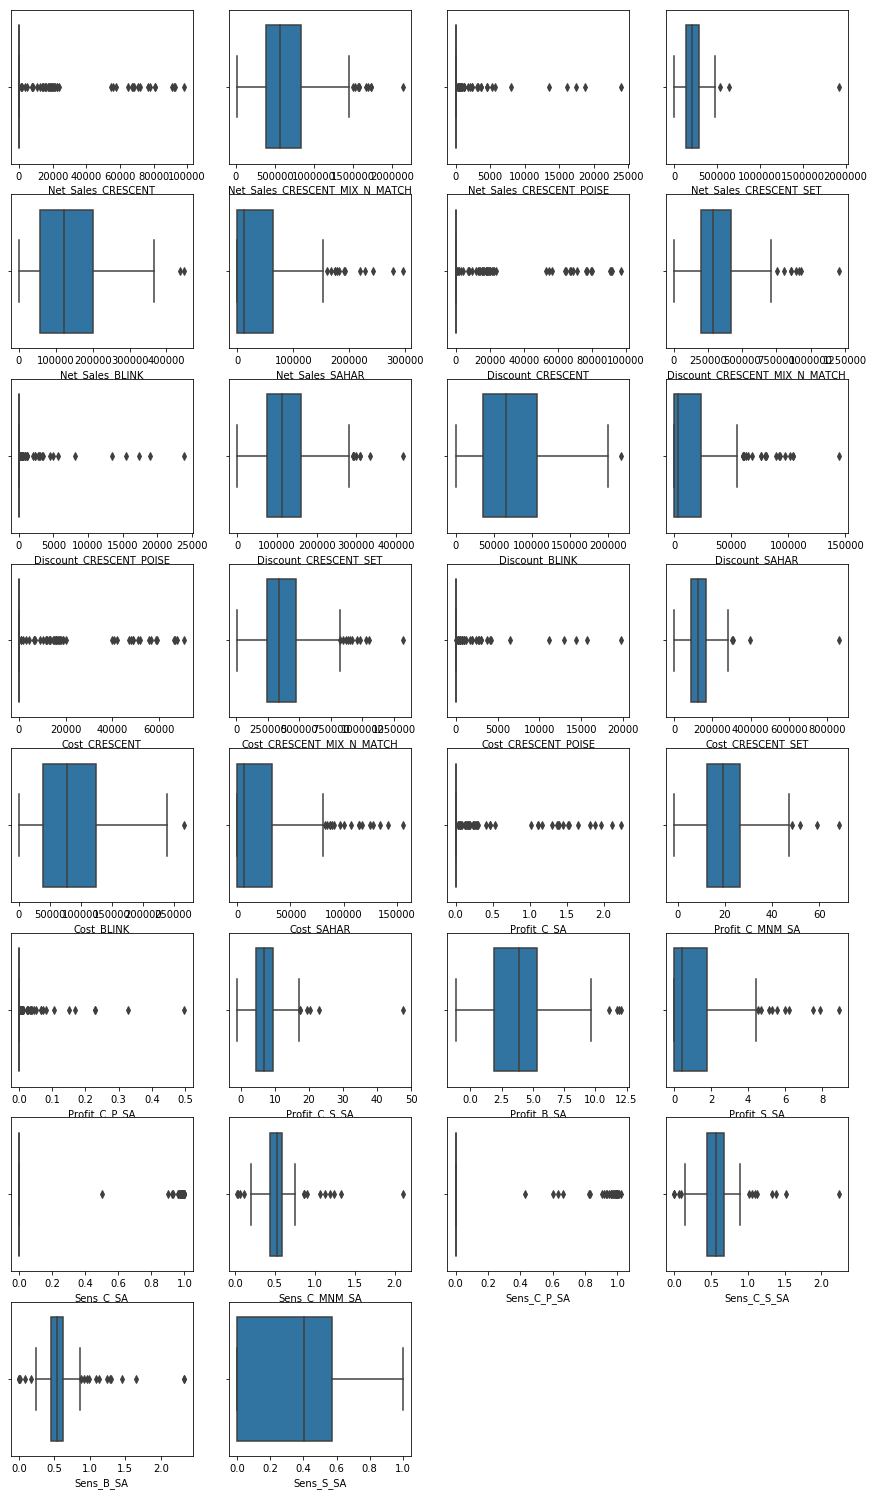

In [537]:
cols = ['Net_Sales_CRESCENT',
       'Net_Sales_CRESCENT_MIX_N_MATCH', 'Net_Sales_CRESCENT_POISE',
       'Net_Sales_CRESCENT_SET', 'Net_Sales_BLINK', 'Net_Sales_SAHAR',
       'Discount_CRESCENT', 'Discount_CRESCENT_MIX_N_MATCH',
       'Discount_CRESCENT_POISE', 'Discount_CRESCENT_SET', 'Discount_BLINK',
       'Discount_SAHAR', 'Cost_CRESCENT', 'Cost_CRESCENT_MIX_N_MATCH',
       'Cost_CRESCENT_POISE', 'Cost_CRESCENT_SET', 'Cost_BLINK', 'Cost_SAHAR',
       'Profit_C_SA', 'Profit_C_MNM_SA',
       'Profit_C_P_SA', 'Profit_C_S_SA', 'Profit_B_SA', 'Profit_S_SA',
       'Sens_C_SA', 'Sens_C_MNM_SA', 'Sens_C_P_SA', 'Sens_C_S_SA', 'Sens_B_SA',
       'Sens_S_SA']

plt.figure(figsize = (15,30))
for i, c in zip(range(len(cols)), cols):
    plt.subplot(9,4,i+1)
    sns.boxplot(x = c, data = data)
plt.show()

### Write and documents Outliers and issues created by them

There are two easy approaches to deal with outliers:

1. Remove the Data points. The problem of such appoaches mean we will be loosing may data points (i.e. Store data) which is unacceptable
2. An alternative and an acceptable option is to clamp the values less than $\mu - 1.96* \sigma$ to $\mu - 1.96* \sigma$ and values greater than $\mu + 1.96* \sigma$ to $\mu + 1.96* \sigma$

In [538]:
def treat_outliers(y):
    miny = np.mean(y) - 1.96 * np.std(y)
    maxy = np.mean(y) + 1.96 * np.std(y)
    y[y < miny] = miny
    y[y > maxy] = maxy
    return(y)
    
for c in cols:
    data[c+'_outlier_treated'] = treat_outliers(data[c].copy())

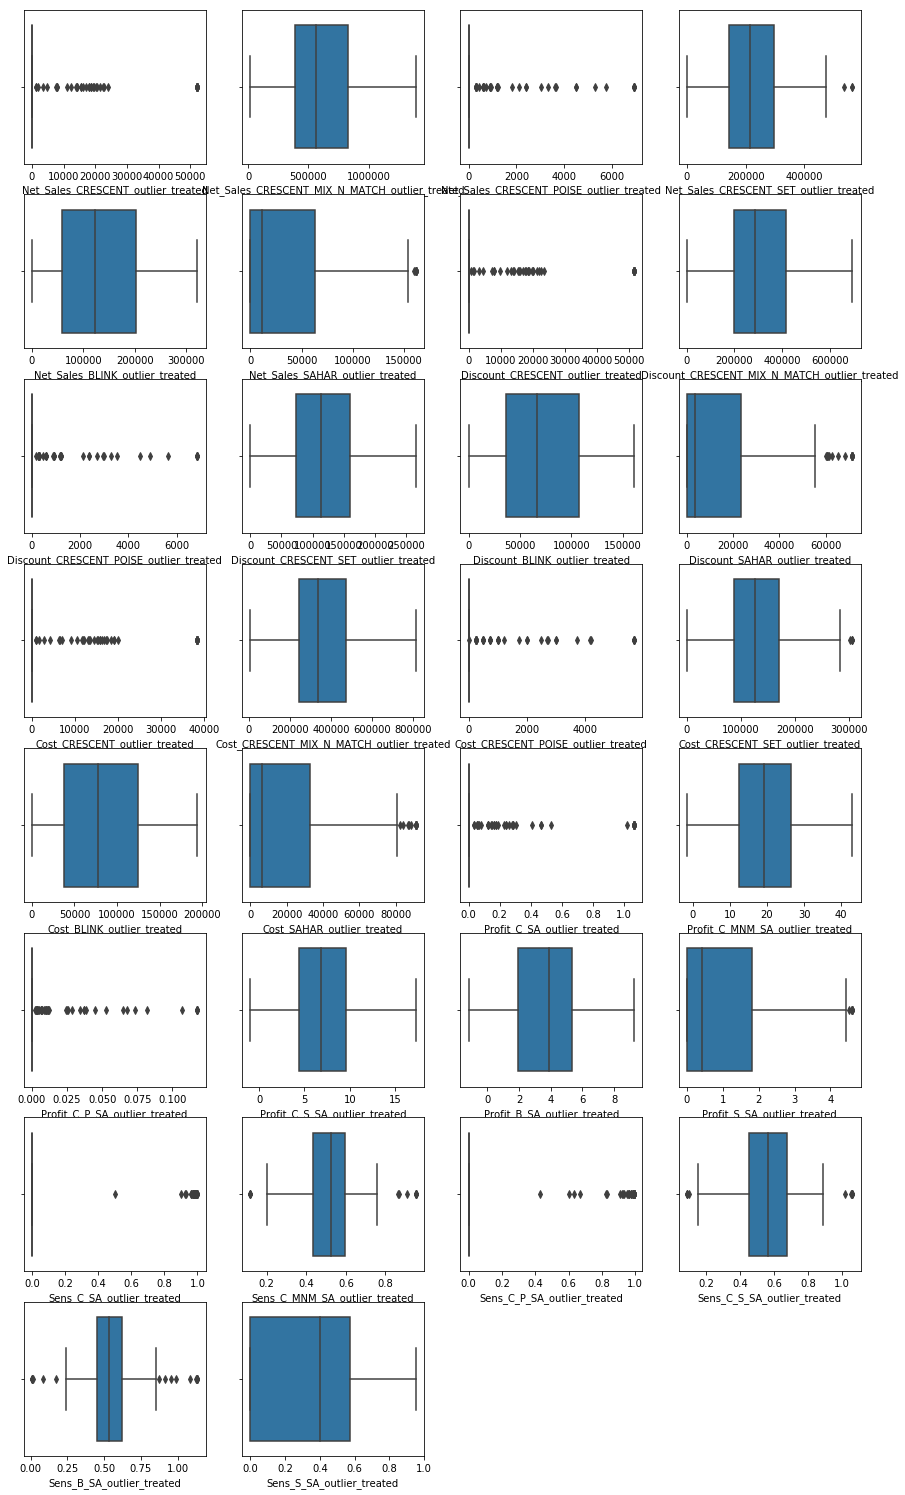

In [541]:
cols = [c for c in data.columns if '_outlier_' in c]
plt.figure(figsize = (15, 30))
for i, c in zip(range(len(cols)), cols):
    plt.subplot(9,4,i+1)
    sns.boxplot(x = c, data = data)
plt.show()

# Q-1-3 - Hierarchial Clustering

In [544]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.cm as cm
cols = ['EAST', 'NORTH', 'SOUTH', 'WEST',
       'Store_Area',       'Net_Sales_CRESCENT_outlier_treated',
       'Net_Sales_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Net_Sales_CRESCENT_POISE_outlier_treated',
       'Net_Sales_CRESCENT_SET_outlier_treated',
       'Net_Sales_BLINK_outlier_treated', 'Net_Sales_SAHAR_outlier_treated',
       'Discount_CRESCENT_outlier_treated',
       'Discount_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Discount_CRESCENT_POISE_outlier_treated',
       'Discount_CRESCENT_SET_outlier_treated',
       'Discount_BLINK_outlier_treated', 'Discount_SAHAR_outlier_treated',
       'Cost_CRESCENT_outlier_treated',
       'Cost_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Cost_CRESCENT_POISE_outlier_treated',
       'Cost_CRESCENT_SET_outlier_treated', 'Cost_BLINK_outlier_treated',
       'Cost_SAHAR_outlier_treated', 'Profit_C_SA_outlier_treated',
       'Profit_C_MNM_SA_outlier_treated', 'Profit_C_P_SA_outlier_treated',
       'Profit_C_S_SA_outlier_treated', 'Profit_B_SA_outlier_treated',
       'Profit_S_SA_outlier_treated', 'Sens_C_SA_outlier_treated',
       'Sens_C_MNM_SA_outlier_treated', 'Sens_C_P_SA_outlier_treated',
       'Sens_C_S_SA_outlier_treated', 'Sens_B_SA_outlier_treated',
       'Sens_S_SA_outlier_treated']
cols2 = ['Store_Area',       'Net_Sales_CRESCENT_outlier_treated',
       'Net_Sales_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Net_Sales_CRESCENT_POISE_outlier_treated',
       'Net_Sales_CRESCENT_SET_outlier_treated',
       'Net_Sales_BLINK_outlier_treated', 'Net_Sales_SAHAR_outlier_treated',
       'Discount_CRESCENT_outlier_treated',
       'Discount_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Discount_CRESCENT_POISE_outlier_treated',
       'Discount_CRESCENT_SET_outlier_treated',
       'Discount_BLINK_outlier_treated', 'Discount_SAHAR_outlier_treated',
       'Cost_CRESCENT_outlier_treated',
       'Cost_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Cost_CRESCENT_POISE_outlier_treated',
       'Cost_CRESCENT_SET_outlier_treated', 'Cost_BLINK_outlier_treated',
       'Cost_SAHAR_outlier_treated', 'Profit_C_SA_outlier_treated',
       'Profit_C_MNM_SA_outlier_treated', 'Profit_C_P_SA_outlier_treated',
       'Profit_C_S_SA_outlier_treated', 'Profit_B_SA_outlier_treated',
       'Profit_S_SA_outlier_treated', 'Sens_C_SA_outlier_treated',
       'Sens_C_MNM_SA_outlier_treated', 'Sens_C_P_SA_outlier_treated',
       'Sens_C_S_SA_outlier_treated', 'Sens_B_SA_outlier_treated',
       'Sens_S_SA_outlier_treated']
X = data[cols]
for c in cols2:
    X[c] = StandardScaler().fit_transform(X[c].values.reshape(-1,1))

X['EAST'] = X['EAST'].astype(float)
X['NORTH'] = X['NORTH'].astype(float)
X['SOUTH'] = X['SOUTH'].astype(float)
X['WEST'] = X['WEST'].astype(float)

#### Process of proceeding with Hierarchial Clustering
- STEP 1: We will first determine which is the best linkage method
    - Methods to assess:
        - average
        - single
        - complete
        - ward

[1] "Loss from each of Linkage Methods: "
  average    single  complete      ward 
0.7594538 0.6224832 0.8449897 0.9482476 


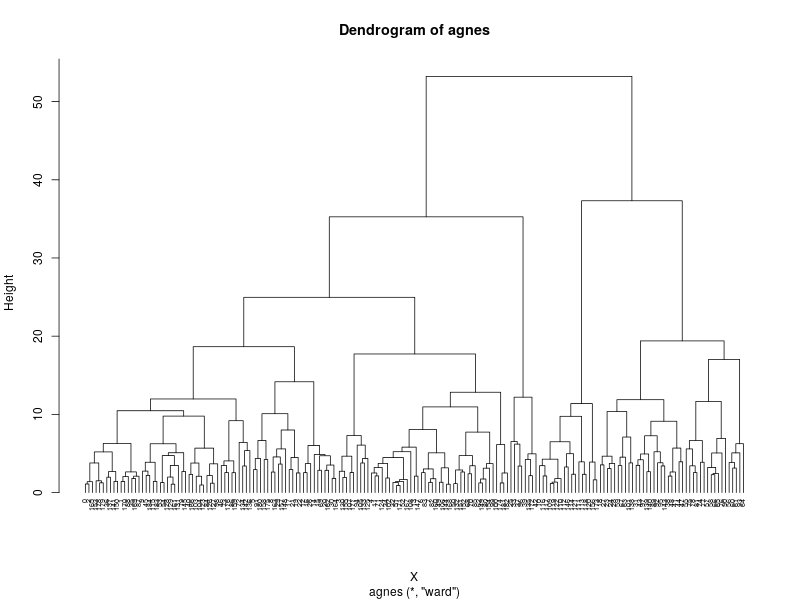

In [489]:
%%R -i X -w 800 -h 600
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Dissimilarity matrix
d <- dist(X, method = "euclidean")

# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(X, method = x)$ac
}
print("Loss from each of Linkage Methods: ")
print(map_dbl(m, ac))
##   average    single  complete      ward 
## 0.7379371 0.6276128 0.8531583 0.9346210


# Hierarchical clustering using Complete Linkage
hc3 <- agnes(X, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes") 

##### From the Results above it is clear "WARD" linkage is performing better than the other linkage options (Values indicate Clustering Coefficient, the closer it is to 1, the better it is)

- STEP 2: Determine the Optimal number of Clusters / Subgroups
    - Methods to be used:
        - SCREE Plot / Elbow Plot
        - Elbow Method

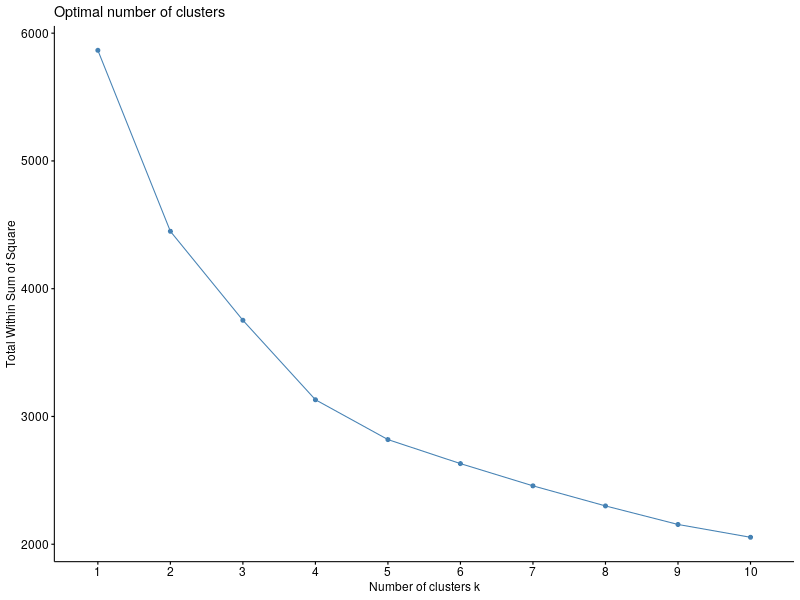

In [490]:
%%R -i X -w 800 -h 600
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

fviz_nbclust(X, FUN = hcut, method = "wss")

#fviz_nbclust(X, FUN = hcut, method = "silhouette")


- As we can see there is no specific Elbow and the curve gently slopes down. The lowest error value is @10, but that will mean too few records in each cluster. **5 / 6** can be considered as a good number from the above plot, but it is not very clear

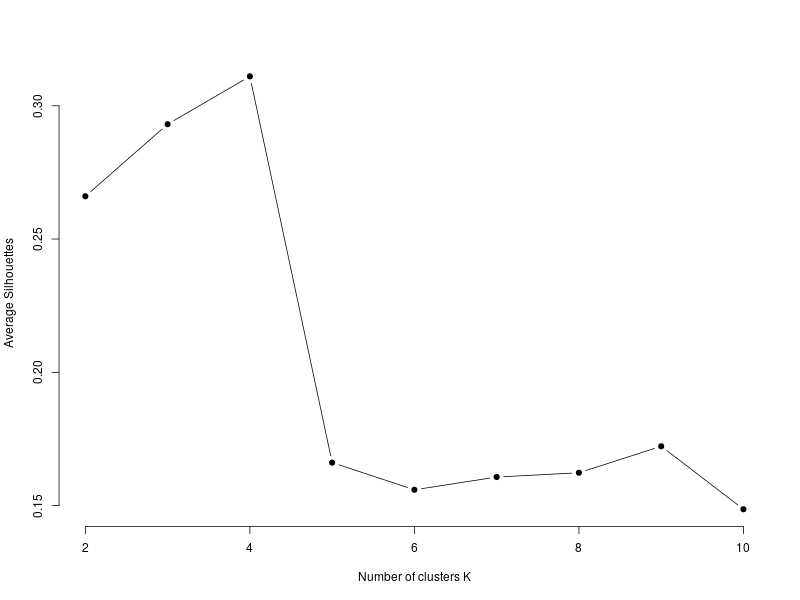

In [491]:
%%R -i X -w 800 -h 600
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

#fviz_nbclust(X, FUN = hcut, method = "silhouette")
d <- dist(X, method = "euclidean")

# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- hclust(d, method = "ward" )
  ss <- silhouette(cutree(km.res, k), dist(X))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:10

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")


- The Silhouette gives a more clear value of 4 as the optimal number of Clusters.

**Between the two options, since the Average Silhouette Width gives a more clear solution, we will adopt this as the strategy for selecting optimal cut points**

OPTIMAL CUTPOINTS = **4**

[1] "Number of members in each cluster"
sub_grp
  1   2   3   4 
114  46  17   8 


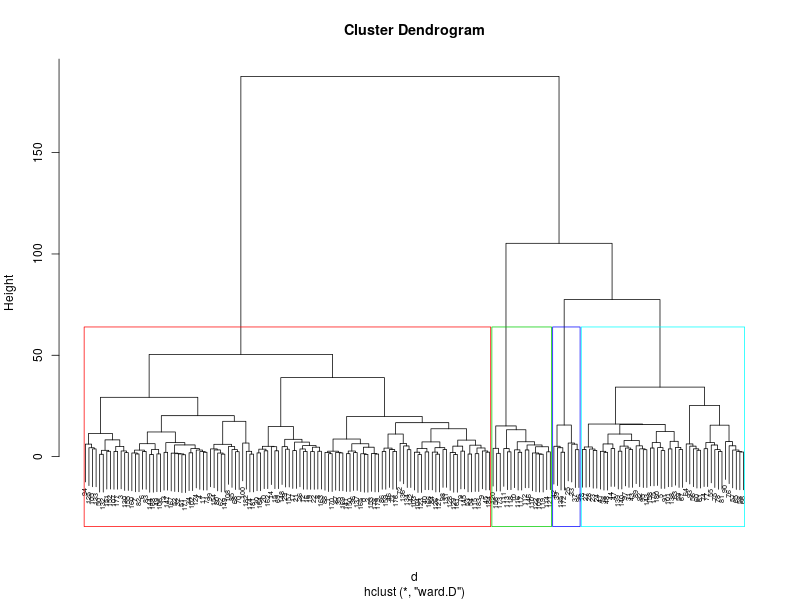

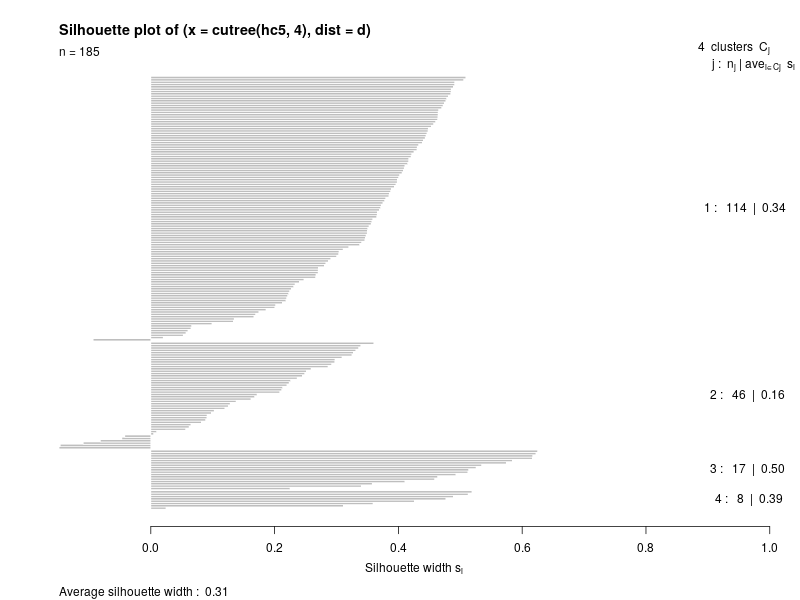

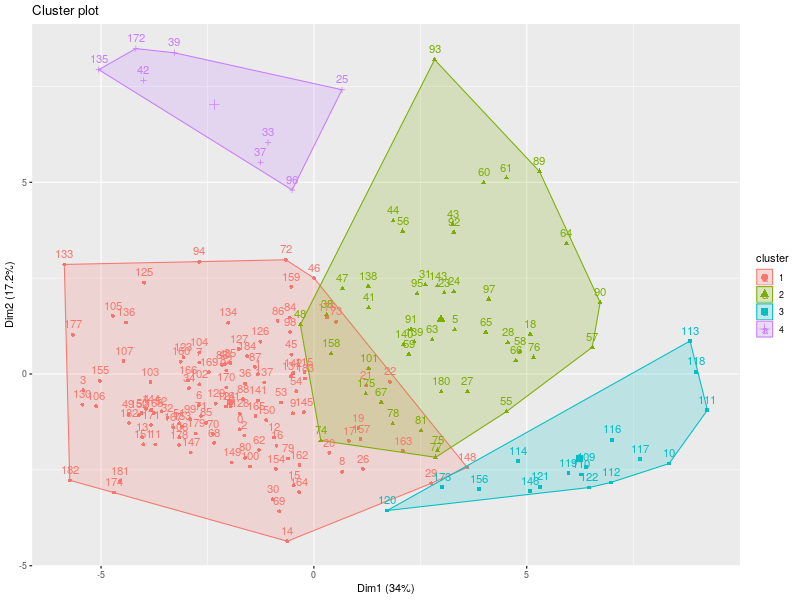

In [492]:
%%R -i X -w 800 -h 600
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Dissimilarity matrix
d <- dist(X, method = "euclidean")

# Ward's method
hc5 <- hclust(d, method = "ward" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

print("Number of members in each cluster")
print(table(sub_grp))
## sub_grp
##  1  2  3  4 
##  7 12 19 12

X %>%
  mutate(cluster = sub_grp) %>%
  head

plot(hc5, cex = 0.6)
rect.hclust(hc5, k = 4,border = 2:5)

plot(silhouette(cutree(hc5,4),d))

fviz_cluster(list(data = X, cluster = sub_grp))


# Q-1-4
- We will try to determine the number of clusters first using Average Silhouette width metrics

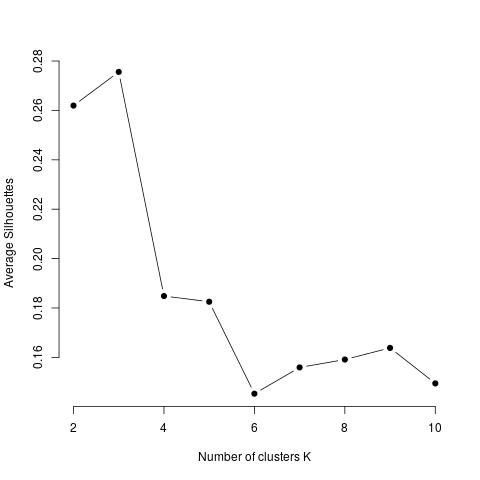

In [493]:
%%R -i X
library(cluster)
options(warn=-1)

set.seed(123)

# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- pam(X, k)
  ss <- silhouette(km.res$clustering, dist(X))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:10

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

OPTIMAL CUTPOINTS = **5**

[1] "Number of members in each cluster"

 1  2  3  4  5 
64 55 41 18  7 


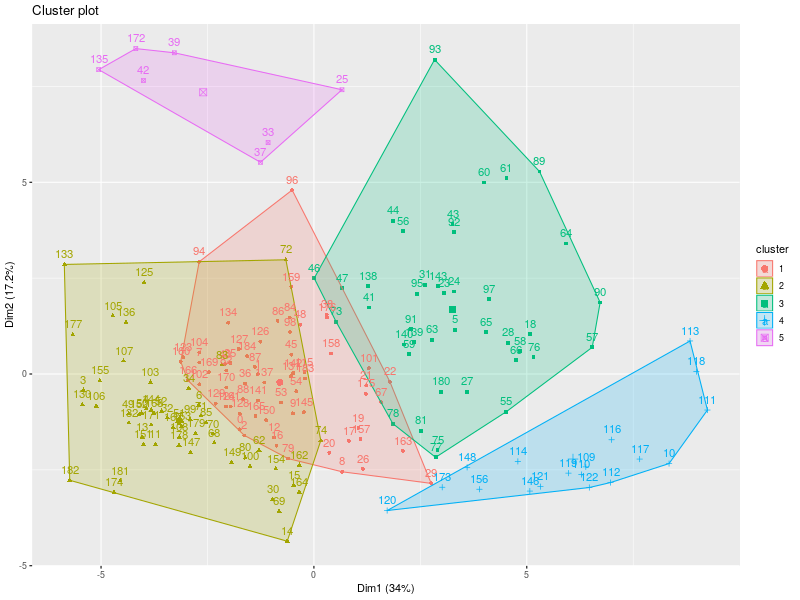

In [494]:
%%R -i X  -w 800 -h 600
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Ward's method
hc5 <- pam(X, 5)

print("Number of members in each cluster")
print(table(hc5$clustering))
## sub_grp
##  1  2  3  4 
##  7 12 19 12

X %>%
  mutate(cluster = hc5$clustering) %>%
  head

fviz_cluster(list(data = X, cluster = hc5$clustering))

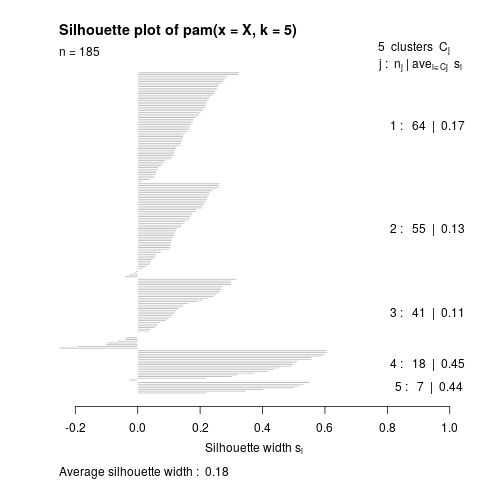

In [495]:
%%R -i X
library(cluster)
options(warn=-1)

set.seed(123)
pam = pam(X, 5)
plot(silhouette(pam), color=c('red'))

##### Advantages of using partitioning around medoids (PAM) over K-means

Both k-means and PAM algorithms are breaking the dataset up into k groups. Also, they are both trying to minimize the distance between points of the same cluster and a particular point which is the center of that cluster. In contrast to the k-means algorithm, PAM algorithm chooses points as centers that belong to the dastaset. PAM algorithm uses a greedy search which may not find the global optimum solution. Medoids are more robust to outliers than centroids, but they need more computation for high dimensional data.



# Q-1-5

From the solution in Q3 and Q4 we see that the Average Silhouette Value for the hierarchial clustering is around .31, which that from partition around mediods is .2.

Range of Silhouette	Interpretation can be considered as follows:
- 0.71-1.0  ==> A strong structure has been found
- 0.51-0.70 ==> A reasonable structure has been found
- 0.26-0.50 ==> The structure is weak and could be artificial
- < 0.25    ==> No substantial structure has been found

From the chart above we can conclude that Hierarchial Clustering is able to identify some sort of weak structures, however PAM is failing to do so. Hence Hierarchial Clustering is the better option for clustering for this dataset.

# Q-1-6

In [496]:
%%R -i X -w 800 -h 600 -o Xo
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Dissimilarity matrix
d <- dist(X, method = "euclidean")

# Ward's method
hc5 <- hclust(d, method = "ward" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

X %>%
  mutate(cluster = sub_grp) %>%
  head

X$Cluster = sub_grp
Xo = X

In [510]:
data['cluster'] = Xo['Cluster']

In [522]:
cols = ['Store_Area', 'EAST', 'NORTH', 'SOUTH', 'WEST', 'Net_Sales_CRESCENT',
       'Net_Sales_CRESCENT_MIX_N_MATCH', 'Net_Sales_CRESCENT_POISE',
       'Net_Sales_CRESCENT_SET', 'Net_Sales_BLINK', 'Net_Sales_SAHAR',
       'Discount_CRESCENT', 'Discount_CRESCENT_MIX_N_MATCH',
       'Discount_CRESCENT_POISE', 'Discount_CRESCENT_SET', 'Discount_BLINK',
       'Discount_SAHAR', 'Cost_CRESCENT', 'Cost_CRESCENT_MIX_N_MATCH',
       'Cost_CRESCENT_POISE', 'Cost_CRESCENT_SET', 'Cost_BLINK', 'Cost_SAHAR',
       'Profit_C_SA', 'Profit_C_MNM_SA',
       'Profit_C_P_SA', 'Profit_C_S_SA', 'Profit_B_SA', 'Profit_S_SA',
       'Sens_C_SA', 'Sens_C_MNM_SA', 'Sens_C_P_SA', 'Sens_C_S_SA', 'Sens_B_SA',
       'Sens_S_SA', 'cluster']

In [523]:
pd.options.display.max_rows = None

data[cols].groupby('cluster').agg([np.mean, 'count']).T

cluster                                           1              2  \
Store_Area                     mean    10937.526316   17155.021739   
                               count     114.000000      46.000000   
EAST                           mean        0.219298       0.108696   
                               count     114.000000      46.000000   
NORTH                          mean        0.245614       0.086957   
                               count     114.000000      46.000000   
SOUTH                          mean        0.324561       0.521739   
                               count     114.000000      46.000000   
WEST                           mean        0.210526       0.282609   
                               count     114.000000      46.000000   
Net_Sales_CRESCENT             mean     2782.873333    1845.039783   
                               count     114.000000      46.000000   
Net_Sales_CRESCENT_MIX_N_MATCH mean   446292.892719  923379.151087   
                               count     114.000000      46.000000   
Net_Sales_CRESCENT_POISE       mean      137.643246     679.847826   
                               count     114.000000      46.000000   
Net_Sales_CRESCENT_SET         mean   172786.258772  353120.086739   
                               count     114.000000      46.000000   
Net_Sales_BLINK                mean    90317.010088  237694.458913   
                               count     114.000000      46.000000   
Net_Sales_SAHAR                mean     9995.033070  116662.322174   
                               count     114.000000      46.000000   
Discount_CRESCENT              mean     2729.661754    1802.460217   
                               count     114.000000      46.000000   
Discount_CRESCENT_MIX_N_MATCH  mean   229744.426140  415795.102609   
                               count     114.000000      46.000000   
Discount_CRESCENT_POISE        mean      130.330439     609.304348   
                               count     114.000000      46.000000   
Discount_CRESCENT_SET          mean    94555.596491  167707.156739   
                               count     114.000000      46.000000   
Discount_BLINK                 mean    48477.355702  111309.243261   
                               count     114.000000      46.000000   
Discount_SAHAR                 mean     4096.756404   49634.351739   
                               count     114.000000      46.000000   
Cost_CRESCENT                  mean     2341.904912    1549.296087   
                               count     114.000000      46.000000   
Cost_CRESCENT_MIX_N_MATCH      mean   267148.182544  528303.654783   
                               count     114.000000      46.000000   
Cost_CRESCENT_POISE            mean      108.533333     520.335000   
                               count     114.000000      46.000000   
Cost_CRESCENT_SET              mean   104752.794825  201441.456304   
                               count     114.000000      46.000000   
Cost_BLINK                     mean    56863.698158  141591.625435   
                               count     114.000000      46.000000   
Cost_SAHAR                     mean     5610.929737   66242.799348   
                               count     114.000000      46.000000   
Profit_C_SA                    mean        0.045156       0.014974   
                               count     114.000000      46.000000   
Profit_C_MNM_SA                mean       17.116570      24.601617   
                               count     114.000000      46.000000   
Profit_C_P_SA                  mean        0.002808       0.009468   
                               count     114.000000      46.000000   
Profit_C_S_SA                  mean        6.505019       9.401245   
                               count     114.000000      46.000000   
Profit_B_SA                    mean        3.124455       5.993844   
                               count     114.000000      46.000000   
Profit_S_S

##### Cluster Characteristics

- Cluster 1:
    - Smaller Stores (Around 1000 Area on average)
    - Equally distributed across all zone. Slightly higher density in the Southern Zone
    - Third in Profitability / Unit of Store Area
    - Majority of Revenue comes from Sales of Cresent Mix & match, Cresent Set and Blink (in the order as specified)
    - All the above items are also sensitive to Discounts being offered, i.e. > 50% are sold on discount

- Cluster 2:
    - Largest Stores (Around 1700 Area on average)
    - More than 50% of Stores are in the Southern Zone, and another 25% in Western Zone.
    - First in Profitability / Unit of Store Area
    - Majority of Revenue comes from Sales of Cresent Mix & match, Cresent Set and Blink (in the order as specified)
    - Its sells more than 50% of its products without Discount (except for Cresent Set) 

- Cluster 3:
    - Mid Sized Stores (Around 1380 Area on average)
    - All the stores are in Southern Zone
    - Second in Profitability / Unit of Store Area
    - Highest revenue grosser acroos all stores on average
    - Majority of Revenue comes from Sales of Cresent Mix & match, Cresent Set and Blink (in the order as specified)
    - Its sells more than 50% of its products on Discount

- Cluster 4:
    - Mid Sized Stores (Around 1300 Area on average)
    - More than 50% of Stores are in the Western Zone, and another 25% in Eastern Zone.
    - Least in Profitability / Unit of Store Area
    - Lowest revenue grosser across all stores on average across most products
    - Its sells approx 90% of its products with Discount